To use this notebook, you may need to install some packages if you don't have them. Follow the instructions in cell outputs to install the necessary packages.

In [1]:
using Plots

In [2]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.

---

Extract a subplot from an existing plot.

# Examples

```julia-repl
julia> p1, p2 = plot(1:2), plot(10:20)
julia> pl = plot(p1, p2)  # plot containing 2 subplots

julia> plot(pl.subplots[1])  # extract 1st subplot as a standalone plot
julia> plot(pl.subplots[2])  # extract 2nd subplot as a standalone plot
```

---

REPL.Message("Extended help is available with `??`", (color = :cyan, bold = true))


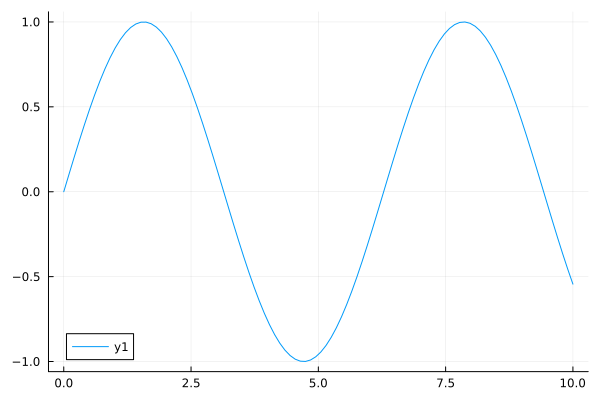

In [3]:
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

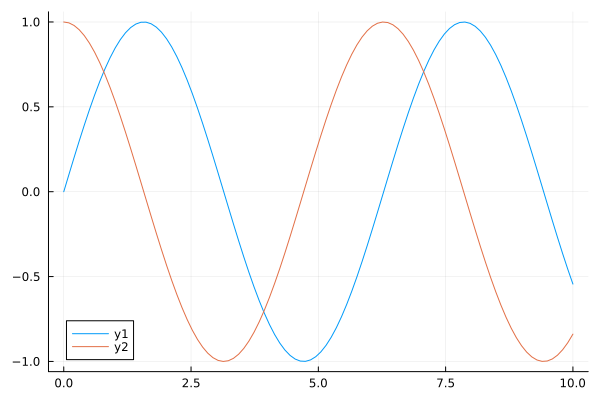

In [4]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
plot(x, [y1 y2])

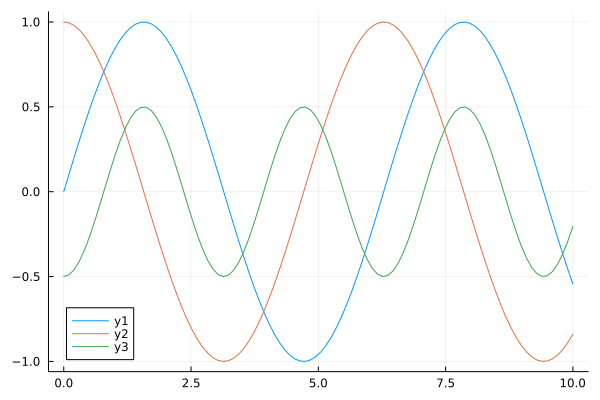

In [5]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
p = plot(x, [y1 y2])

# @. is a macro - it turns all function calls/operators and assignment statements to "dot" expressions
y3 = @. sin(x)^2 - 1/2
# '!' tells Julia to plot over the existing plot
plot!(p, x, y3)

Common Arguments for `plot`

+ title
+ label
+ xscale/yscale (e.g., :log10)
+ linewidth
+ linestyle
+ legend (e.g., :outerbottomright)
+ seriestype (e.g. :line, :bar, :scatter, :pie, :histogram, :heatmap, etc.)

and many more - check them out at https://docs.juliaplots.org/latest/attributes/, or use `plotattr` to search for a property via fuzzy finding 

In [6]:
plotattr("markercolor")

Color of the interior of the marker or shape. `:match` will take the value from `:seriescolor`.

Aliases: (:markercolors, :markercolour, :mc, :mcolor, :mcolour).

Type: Union{Integer, Symbol, ColorSchemes.ColorScheme, Colorant}.

`Series` attribute, defaults to `match`.


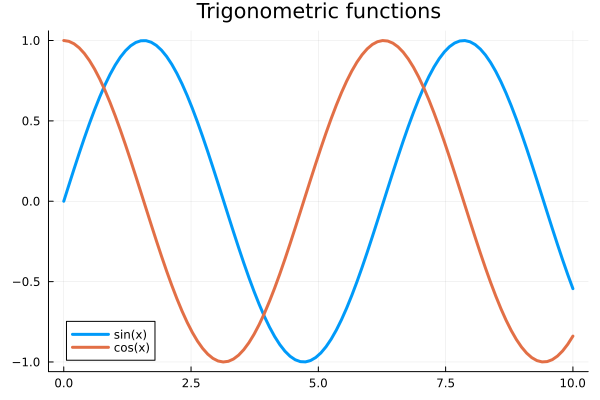

In [7]:
plot(x, [y1 y2], title="Trigonometric functions", label=["sin(x)" "cos(x)"], linewidth=3)

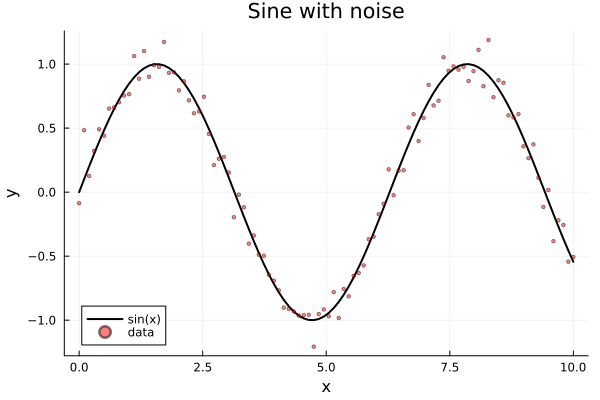

In [8]:
x = range(0, 10, length=100)
y = sin.(x)
y_noisy = @. sin(x) + 0.1*randn()

plot(x, y, label="sin(x)", lc=:black, lw=2)
scatter!(x, y_noisy, label="data", mc=:red, ms=2, ma=0.5)
plot!(legend=:bottomleft)
title!("Sine with noise")
xlabel!("x")
ylabel!("y")

In [9]:
#drop-in replacement for Plots.jl with many useful statistics features
using StatsPlots

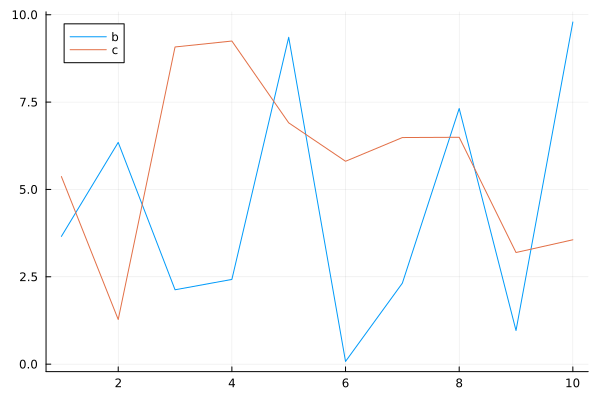

In [10]:
using DataFrames
df = DataFrame(a=1:10, b=10*rand(10), c=10*rand(10))
# @df a macro in StatsPlots - it allows you to plot a DataFrame directly by using the column names 
@df df plot(:a, [:b :c])

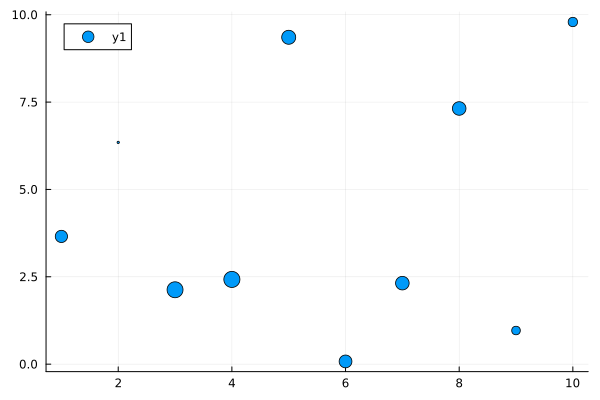

In [11]:
@df df scatter(:a, :b, markersize = 4 .* log.(:c .+ 0.1))

In [12]:
import RDatasets
singers = RDatasets.dataset("lattice", "singer")

Row,Height,VoicePart
,Int32,Cat…
1,64,Soprano 1
2,62,Soprano 1
3,66,Soprano 1
4,65,Soprano 1
5,60,Soprano 1
6,61,Soprano 1
7,65,Soprano 1
8,66,Soprano 1
9,65,Soprano 1


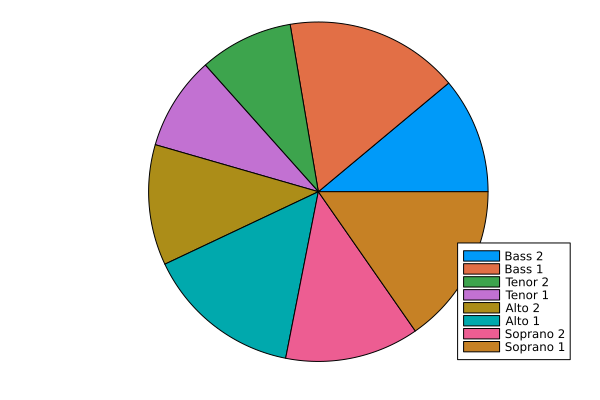

In [13]:
counts = combine(groupby(singers, string.(:VoicePart)), nrow => :count)
pie(string.(counts.VoicePart), counts.count)

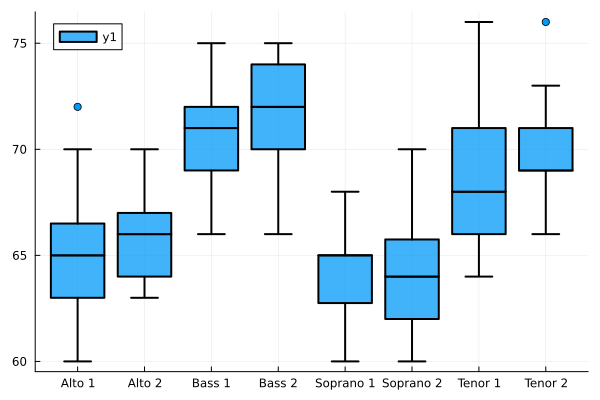

In [14]:
@df singers boxplot(string.(:VoicePart), :Height, fillalpha=0.75, linewidth=2)

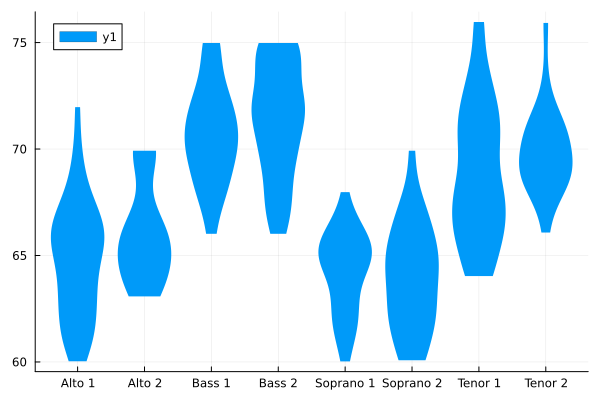

In [15]:
@df singers violin(string.(:VoicePart), :Height, linewidth=0)

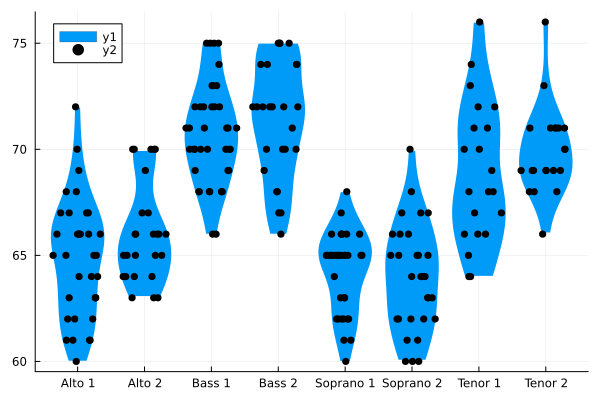

In [16]:
@df singers dotplot!(string.(:VoicePart), :Height, marker=(:black, stroke(0)))